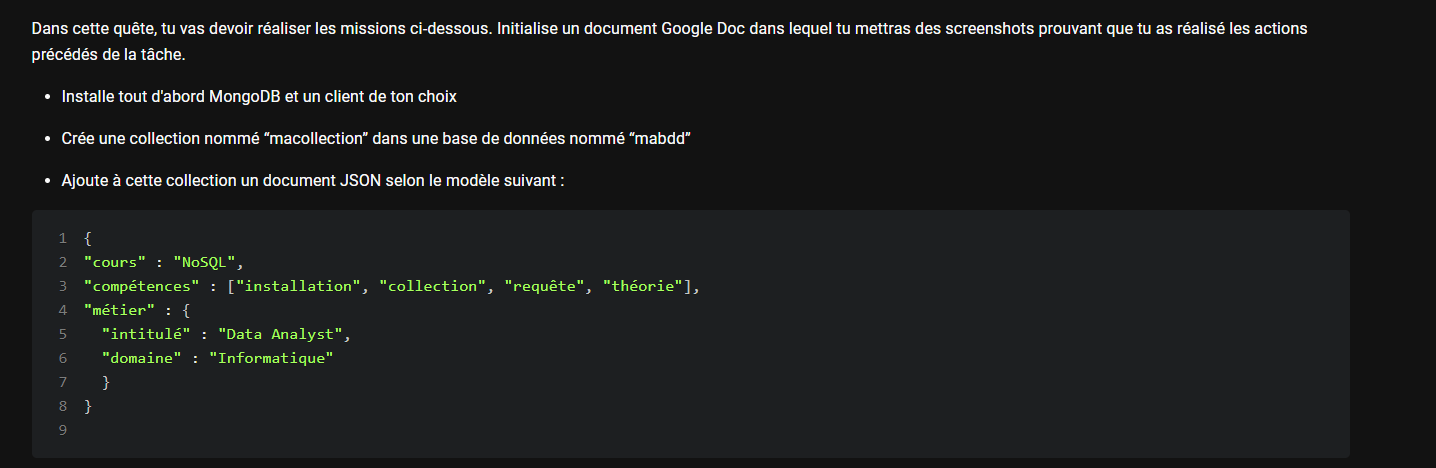

##Crée une collection nommé “macollection” dans une base de données nommé “mabdd”

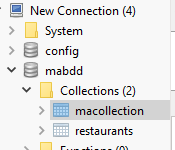

##Ajoute à cette collection un document JSON selon le modèle suivant :

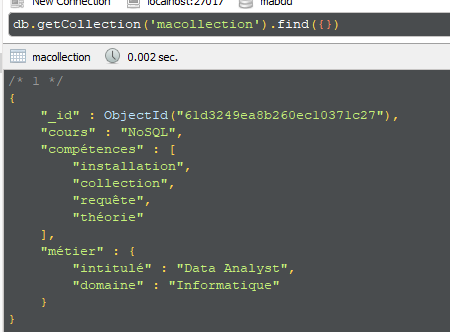

##Ecris une requête qui compte le nombre de restaurants avec un grade A

In [ ]:
db.restaurants.count( { "grades.grade": "A" } )

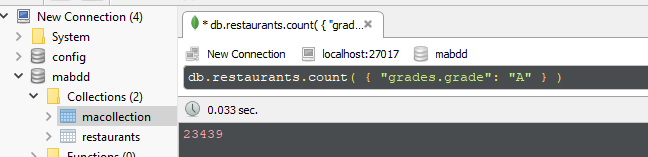

##Ecris une requête qui trie tous les différents scores de restaurants en ordre décroissant

In [ ]:
db.restaurants.find().sort( { "grades.score": -1 } )

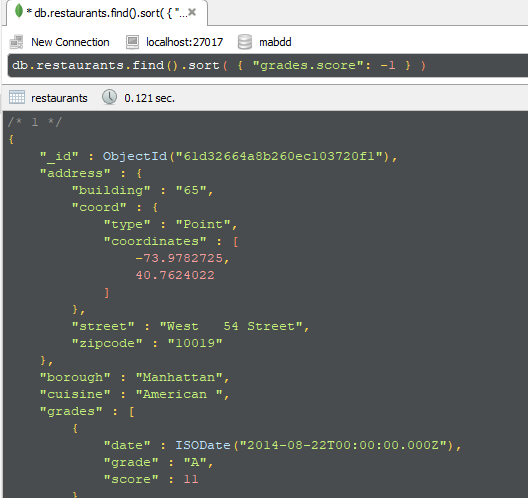

##Ecris une requête qui trouve tous les restaurants dans lesquels les noms des villes commencent par la lettre “B”, “C” ou “D”, ou se terminent par une voyelle sauf “y”

In [ ]:
db.restaurants.find( 

{$or: [{"borough": /.*B.*/}, {"borough": /.*C.*/}, {"borough": /.*D.*/}, {"borough": {$regex: /[aeiou]^/}}  ]}

)

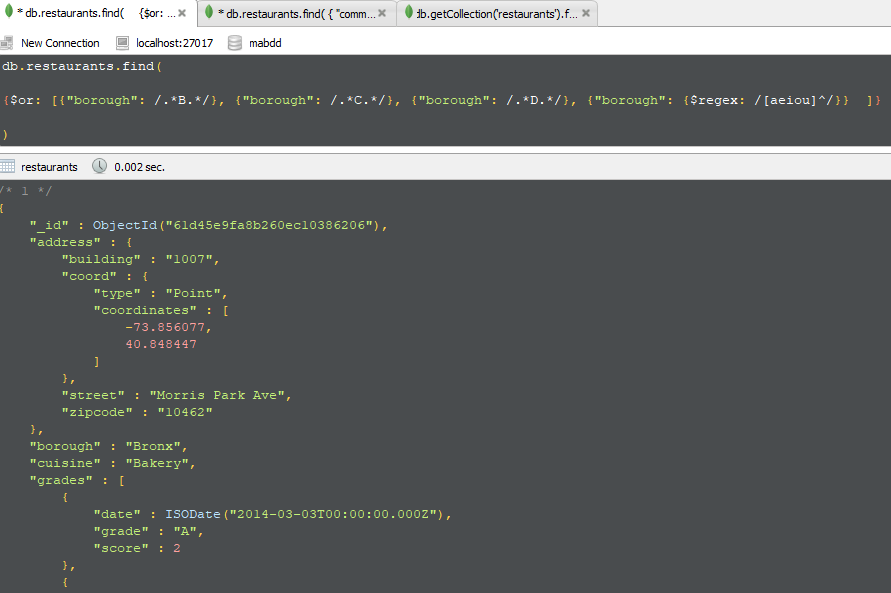

##Ecris une requête qui affiche tous les restaurants si et seulement si le score est inférieur à 20 ou égale à 25, 30, 35 et 40 (n’oubliez pas de préciser que la vérification se fasse sur chaque instance)

In [ ]:
db.restaurants.find( 

{$or: [{"grades.score": { $lt: 20 }}, {"grades.score": { $eq : 25 }}, {"grades.score": { $eq : 30 }}, {"grades.score": { $eq : 35 }}, {"grades.score": { $eq : 40 }}  ]}

)

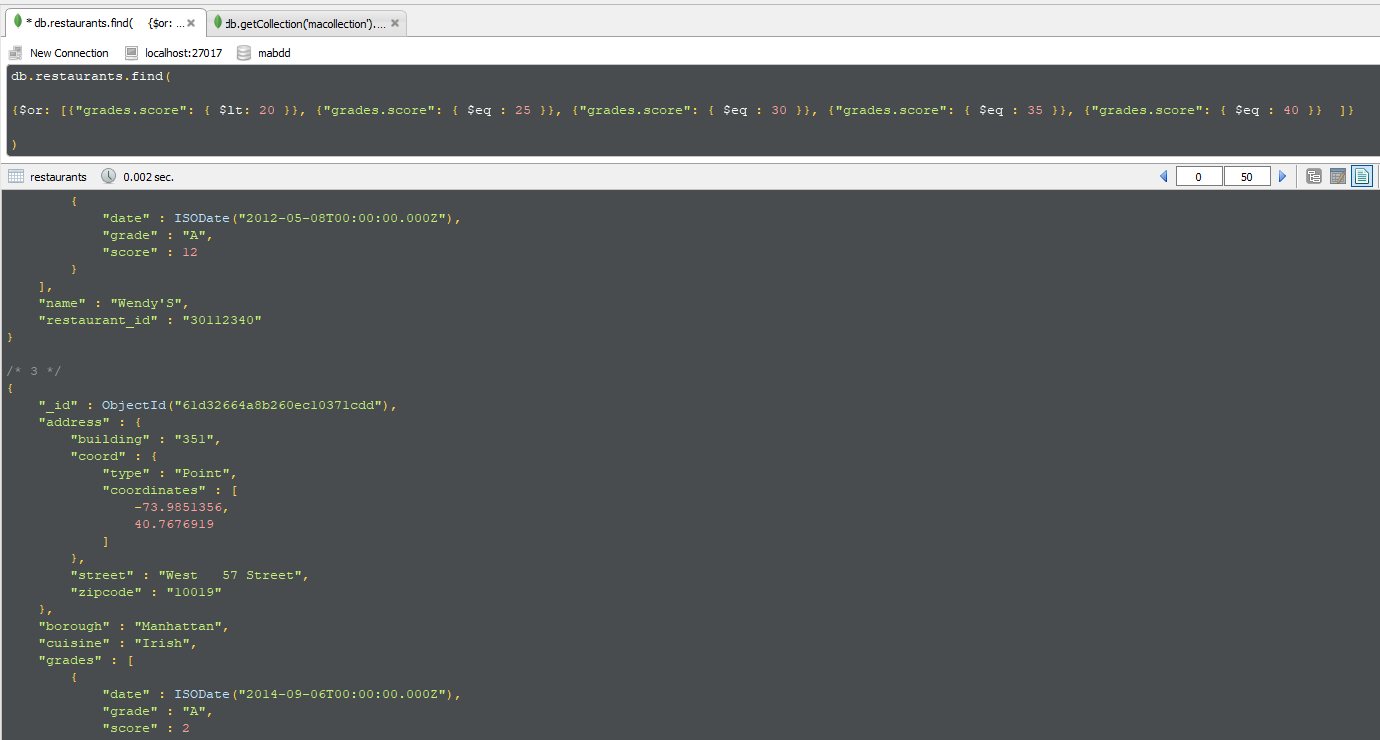

##Ecris une requête qui fait la somme du nombre de restaurants par type de cuisine

In [ ]:
db.restaurants.aggregate(
   [
     { $group: { "_id": "$cuisine" , "count": { $sum: 1 } } }
   ]
);

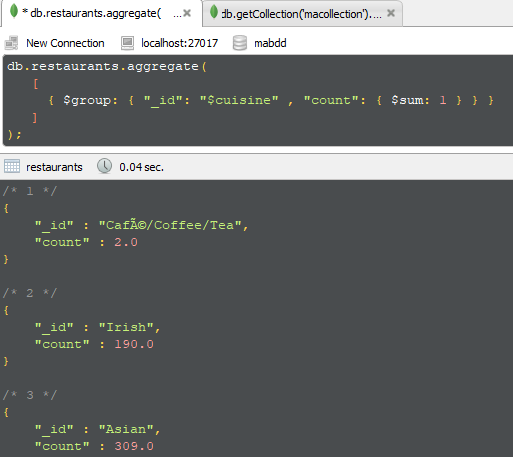

##Ecris une requête qui ajoute le commentaire “Je gère le NoSQL” pour les boroughs dont le nom commence par “B”

In [ ]:
db.restaurants.updateMany(
    {"borough": /.*B.*/},
    {
      $set: { "comment": "Je gère le NoSQL" }
    }
)

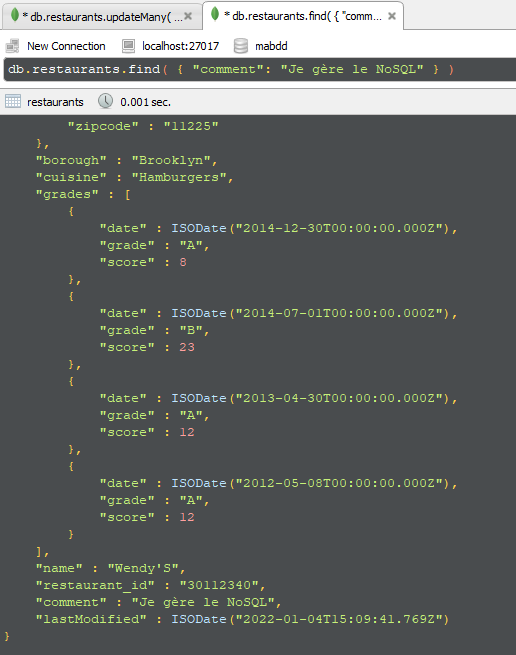

##Ecris une requête qui supprime la clé “adress” des restaurants qui ont un score supérieur à 25

In [ ]:
db.restaurants.updateMany(
   {"grades.score": { $gt: 25 }},
   { $unset:  {"address": ""}  }
)

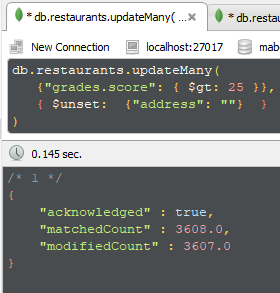

##Ecris une requête qui supprime tous les restaurants dont le nom de quartier est “Queens”

In [ ]:
db.restaurants.remove( { "borough": "Queens" } )

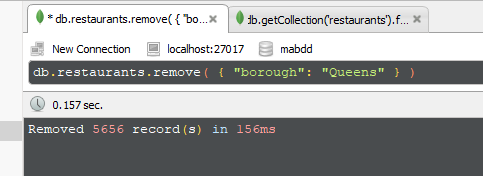

##Commente le code ci-dessous pour expliquer ce qu'il fait :

In [ ]:
varUnwind = {$unwind : "$grades"} #This part deconstructs the grades array to output each element as a new document
varGroup4 = { $group : {"_id" : "$borough", "moyenne" : {$avg : "$grades.score"} } }; # this part group the result by borough and display the average score
varSort2 = { $sort : { "moyenne" : -1 } } # this part sort borough by scores descending
db.restaurants.aggregate( [ varUnwind, varGroup4, varSort2 ] ); # this activates each previous variables together